# **Drive Mount and Module/Packages Importation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import gspread
from google.colab import auth
auth.authenticate_user()
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

!pip install scikit-fda
from skfda.exploratory.visualization.clustering import ClusterMembershipLinesPlot, ClusterMembershipPlot, ClusterPlot
from skfda.ml.clustering import FuzzyCMeans, KMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Population Dataset**

In [ ]:
worksheet = gc.open('Total_Dataset').sheet1
rows = worksheet.get_all_values()
data = pd.DataFrame.from_records(rows)

columns=data.iloc[0]
data1 = data.rename(columns=columns)
data2 = data1.drop(['위치'], axis=1)
data3 = data2.drop(['총인구'], axis=1)
data4 = data3.drop(['운전자'], axis=1)
dataset = data4.drop(data4.index[0])

dataset.head(10)

,평균나이,세대원1명,세대원2명,세대원3명이상,1인가구,2인가구,3인이상가구,외국인인구,비혈연6인이상가구인구,집단가구인구,...,등록된차량수,주차장보급율,면허소지_15~19세,면허소지_20대,면허소지_30대,면허소지자_40대,면허소지자_50대,면허소지자_60대,면허소지자_70대,면허소지자_80대이상
1,46.8,758.0,646.0,1312.0,550.0,654.0,1120.0,5.0,6.0,0.0,...,3599.0,167.9,2107.0,47107.0,58045.0,88650.0,100650.0,111145.0,38304.0,6039.0
2,40.9,1648.0,2199.0,5932.0,1058.0,2081.0,4288.0,59.0,0.0,123.0,...,9948.0,167.9,11743.0,213886.0,273458.0,421950.0,425700.0,304017.0,79423.0,9961.0
3,42.1,3541.0,2275.0,4221.0,2280.0,2095.0,3423.0,165.0,46.0,169.0,...,8563.0,167.9,8159.0,211647.0,323995.0,377100.0,379100.0,285034.0,73281.0,9864.0
4,42.7,9526.0,2381.0,2088.0,7121.0,2983.0,2173.0,716.0,76.0,29.0,...,10529.0,167.9,3544.0,295505.0,506792.0,359600.0,266250.0,210455.0,74674.0,11938.0
5,43.0,6474.0,2093.0,2846.0,4618.0,2608.0,2853.0,318.0,31.0,0.0,...,10295.0,167.9,5091.0,229555.0,396183.0,362250.0,283400.0,204997.0,82892.0,11938.0
6,38.6,602.0,1058.0,5596.0,350.0,1147.0,5489.0,38.0,0.0,0.0,...,14360.0,167.9,19140.0,160966.0,134610.0,584600.0,387450.0,185869.0,59461.0,8902.0
7,41.4,2622.0,2493.0,7793.0,1807.0,2567.0,7598.0,169.0,25.0,0.0,...,15069.0,167.9,24175.0,312009.0,294281.0,701000.0,652800.0,408013.0,119661.0,14682.0
8,40.7,5594.0,1689.0,2880.0,4269.0,2117.0,2851.0,318.0,56.0,0.0,...,10306.0,167.9,11485.0,223407.0,297414.0,392850.0,314100.0,147033.0,58551.0,7703.0
9,41.5,2738.0,1663.0,4138.0,1872.0,1871.0,4039.0,141.0,34.0,52.0,...,8974.0,167.9,8026.0,190466.0,283501.0,376850.0,340800.0,242625.0,68390.0,11992.0
10,41.4,2221.0,2455.0,6972.0,1408.0,2676.0,6689.0,171.0,19.0,0.0,...,13615.0,167.9,17272.0,257418.0,311050.0,632550.0,541600.0,337636.0,118751.0,19555.0


In [ ]:
print(dataset.dtypes)

dataset_numeric = dataset.astype(float)

평균나이           object
세대원1명          object
세대원2명          object
세대원3명이상        object
1인가구           object
2인가구           object
3인이상가구         object
외국인인구          object
비혈연6인이상가구인구    object
집단가구인구         object
15세미만          object
15~19세         object
20대            object
30대            object
40대            object
50대            object
60대            object
등록된차량수         object
주차장보급율         object
면허소지_15~19세    object
면허소지_20대       object
면허소지_30대       object
면허소지자_40대      object
면허소지자_50대      object
면허소지자_60대      object
면허소지자_70대      object
면허소지자_80대이상    object
dtype: object


# **Normalization**

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(dataset_numeric)
data_scaled = pd.DataFrame(data_scaled, columns=dataset_numeric.columns)
data_scaled.head()

,평균나이,세대원1명,세대원2명,세대원3명이상,1인가구,2인가구,3인이상가구,외국인인구,비혈연6인이상가구인구,집단가구인구,...,등록된차량수,주차장보급율,면허소지_15~19세,면허소지_20대,면허소지_30대,면허소지자_40대,면허소지자_50대,면허소지자_60대,면허소지자_70대,면허소지자_80대이상
0,0.000242,0.003916,0.003338,0.006778,0.002842,0.003379,0.005786,0.000026,0.000031,0.000000,...,0.018594,0.000867,0.010886,0.243376,0.299886,0.458005,0.520003,0.574225,0.197896,0.031200
1,0.000054,0.002166,0.002890,0.007796,0.001390,0.002735,0.005635,0.000078,0.000000,0.000162,...,0.013073,0.000221,0.015432,0.281084,0.359372,0.554516,0.559444,0.399532,0.104376,0.013090
2,0.000058,0.004898,0.003147,0.005838,0.003154,0.002898,0.004735,0.000228,0.000064,0.000234,...,0.011844,0.000232,0.011285,0.292749,0.448147,0.521602,0.524368,0.394257,0.101362,0.013644
3,0.000055,0.012352,0.003087,0.002707,0.009234,0.003868,0.002818,0.000928,0.000099,0.000038,...,0.013653,0.000218,0.004595,0.383176,0.657147,0.466286,0.345241,0.272893,0.096828,0.015480
4,0.000063,0.009438,0.003051,0.004149,0.006732,0.003802,0.004159,0.000464,0.000045,0.000000,...,0.015008,0.000245,0.007422,0.334652,0.577567,0.528099,0.413149,0.298851,0.120842,0.017404


In [ ]:
#csv로 저장
#data_scaled.to_csv('/content/drive/MyDrive/다함께차찾자')
#!cp data.csv "drive/My Drive/"
with open('/content/drive/MyDrive/다함께차찾자/normalized.csv', 'w') as f:
  data_scaled.to_csv(f)

# **Drawing Dendogram for Determination of Cluster Numbers**

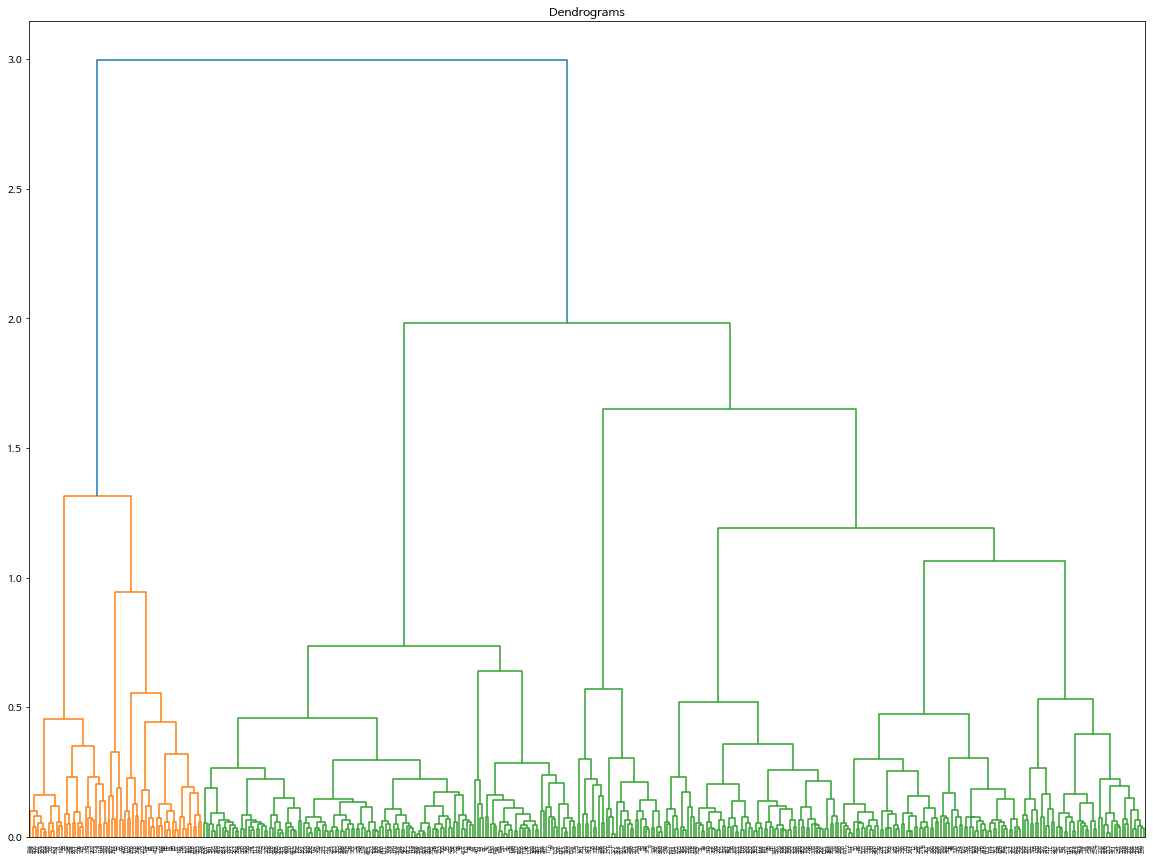

In [ ]:
import scipy.cluster.hierarchy as shc
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(20,15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

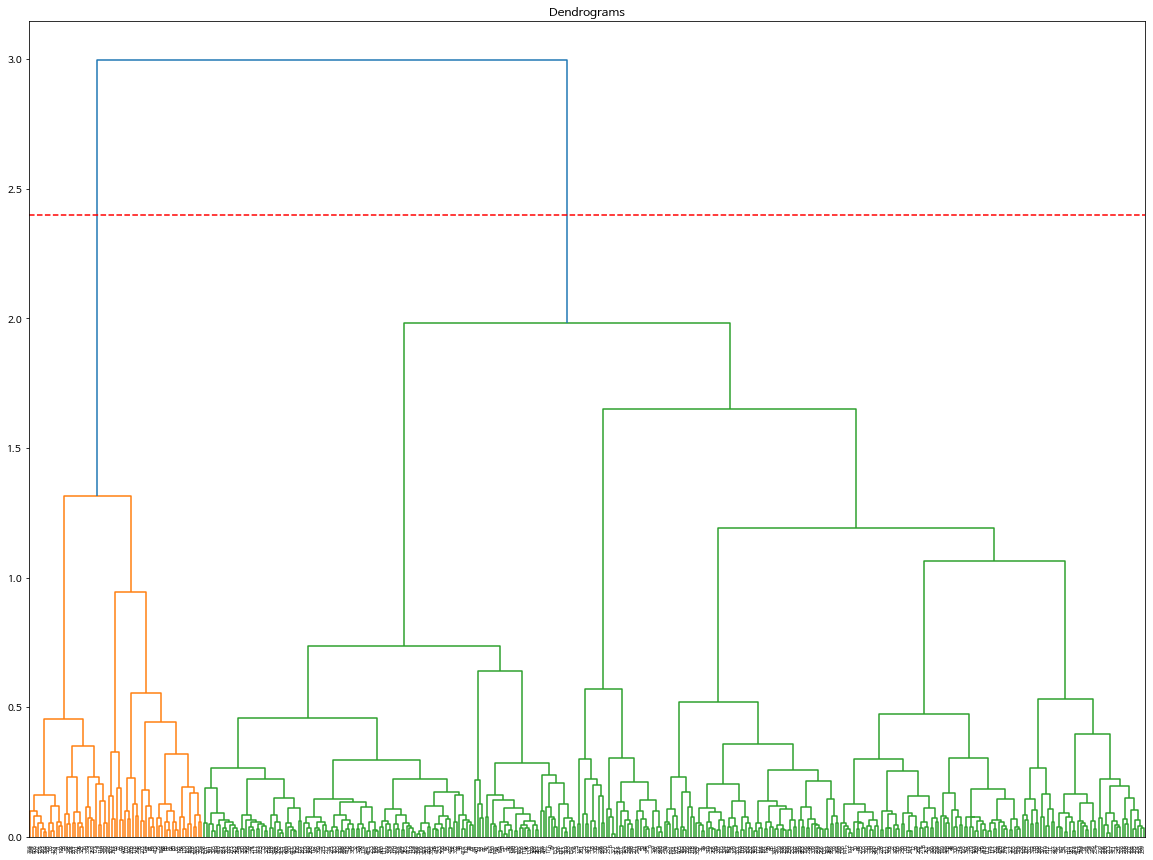

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(20,15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2.4, color='r', linestyle='--')

# **Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([2, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 3, 0,
       0, 3, 0, 2, 2, 0, 3, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2, 3, 0, 2, 2, 0, 3, 0,
       0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 3, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 3, 2, 3, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 3, 3, 0, 3, 0, 2, 2, 0, 3, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2,
       3, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0,

In [ ]:
print(dataset_numeric.columns)

Text(0, 0.5, 'drivers_total')

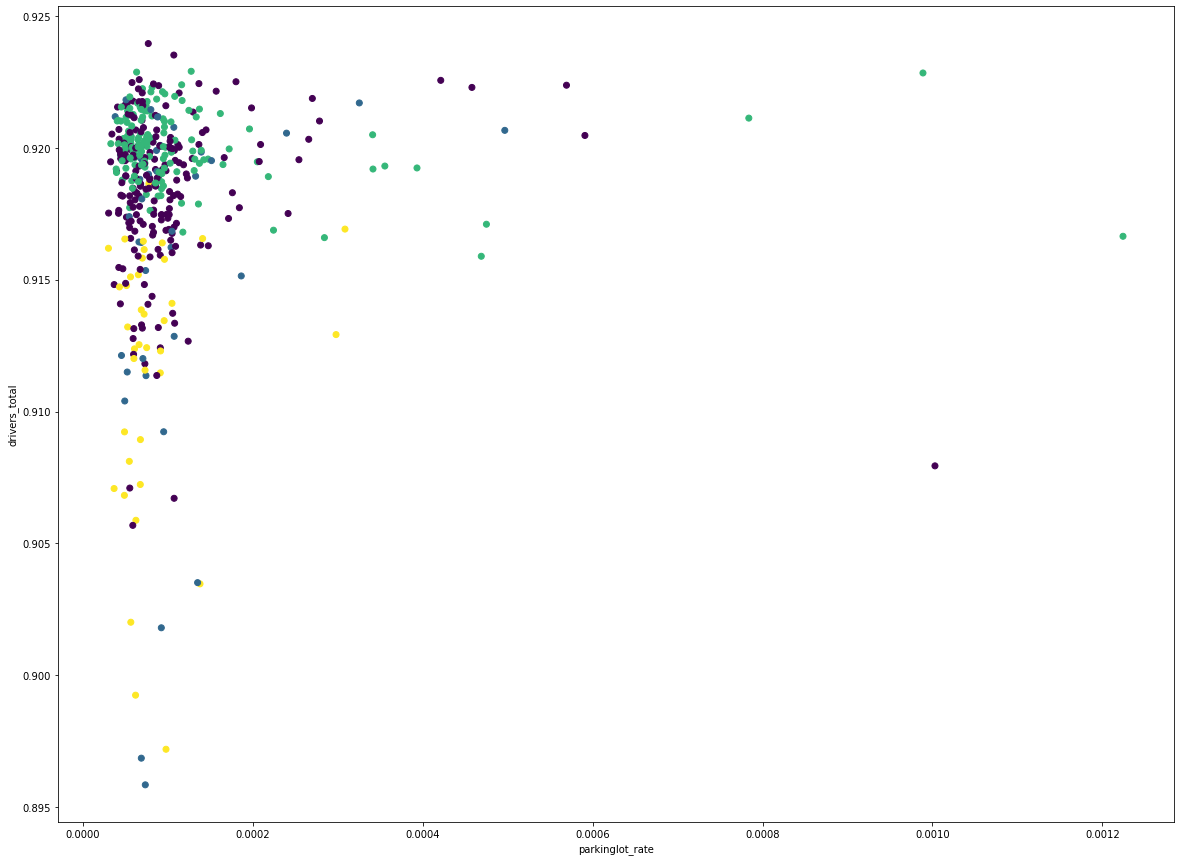

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(20,15)) 
x = 'parkinglot_rate' 
y = 'drivers_total'
plt.scatter(data_scaled[x], data_scaled[y], c=cluster.labels_)
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'population_20s')

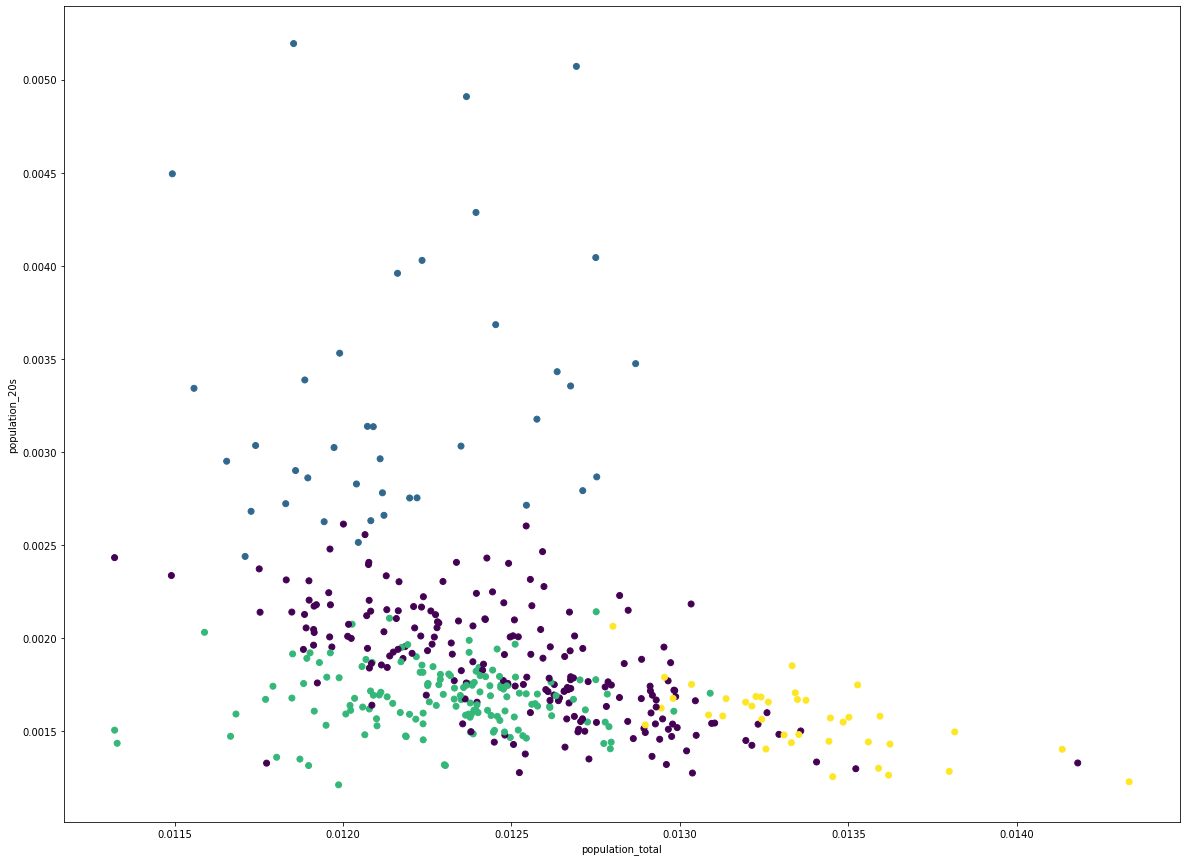

In [ ]:
plt.figure(figsize=(20,15)) 
x = 'population_total' 
y = 'population_20s'
plt.scatter(data_scaled[x], data_scaled[y], c=cluster.labels_)
plt.xlabel(x)
plt.ylabel(y)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([2, 4, 4, 0, 0, 3, 3, 4, 4, 3, 4, 4, 4, 2, 4, 4, 0, 3, 2, 4, 3, 4,
       4, 3, 4, 2, 2, 4, 3, 4, 4, 0, 2, 2, 4, 4, 2, 0, 0, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 4, 1, 0, 2, 3, 4, 2, 2, 4, 3, 0,
       4, 2, 2, 0, 0, 0, 1, 2, 4, 1, 1, 2, 0, 2, 1, 1, 4, 1, 1, 1, 0, 1,
       1, 1, 1, 4, 1, 3, 1, 4, 0, 1, 0, 0, 2, 4, 2, 0, 0, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 4, 2, 0, 2, 0, 2, 4, 0, 4, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 4, 4, 2, 2, 2, 2, 4, 4, 4, 0, 2, 2, 3, 2, 3, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 0, 1, 2, 0, 4, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 4, 1, 0, 0, 0, 0, 1, 4, 0, 0, 4, 4, 4, 0, 1,
       0, 0, 4, 3, 4, 1, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 2, 4, 1, 1, 4,
       0, 2, 2, 2, 2, 2, 4, 4, 3, 3, 4, 3, 0, 2, 2, 4, 3, 4, 4, 4, 3, 4,
       4, 3, 4, 4, 4, 0, 1, 0, 0, 2, 0, 2, 4, 0, 0, 0, 4, 0, 4, 3, 4, 2,
       3, 1, 0, 0, 2, 0, 1, 4, 0, 2, 2, 4, 4, 2, 0, 2, 4, 4, 4, 0, 2, 2,
       2, 2, 0, 0, 4, 0, 0, 0, 0, 2, 2, 3, 4, 3, 4,

In [ ]:
print(dataset_numeric.columns)

Index(['average_age_total', 'member_1', 'member_2', 'member_over2',
       'household_1', 'household_2', 'household_over2',
       'population_foreign_total', 'population_community6+_total',
       'population_GroupFacility_total', 'population_total',
       'population_under15', 'population_15to19', 'population_20s',
       'population_30s', 'population_40s', 'population_50s',
       'population_over60', 'drivers_total', 'drivers_15to19', 'drivers_20s',
       'drivers_30s', 'drivers_40s', 'drivers_50s', 'drivers_60s',
       'drivers_70s', 'drivers_over80', 'vehicle_total', 'parkinglot_rate'],
      dtype='object')


Text(0, 0.5, 'population_20s')

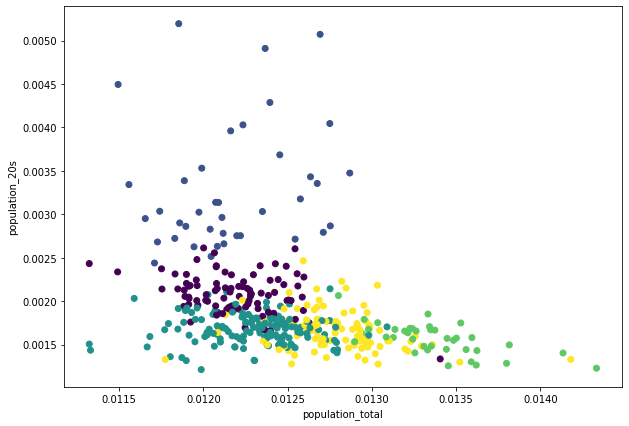

In [ ]:
plt.figure(figsize=(10, 7)) 
x = 'population_total' 
y = 'population_20s'
plt.scatter(data_scaled[x], data_scaled[y], c=cluster.labels_)
plt.xlabel(x)
plt.ylabel(y)

# **K-means Clustering**

In [ ]:
km = KMeans(n_clusters = 4,random_state=21)
km.fit(data_scaled)

In [ ]:
new_labels =pd.DataFrame(km.labels_)
new_labels.columns=['predict']

In [ ]:
r2 = pd.concat([data_scaled,new_labels],axis=1)

In [ ]:
#pairplot with Seaborn
sns.pairplot(r2,hue='predict')
plt.show()

# **DBSCAN**

In [ ]:
# 하이퍼파라미터인 eps와 min_samples 값 넣어보면서 적당한 값으로 조정
# create model and prediction
model = DBSCAN(eps=0.01,min_samples=3)
predict = pd.DataFrame(model.fit_predict(data_scaled))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([data_scaled,predict],axis=1)

#print(r)
print(predict['predict'].max())
print(predict['predict'].min())

9
-1


In [ ]:
%%time
# 시간 꽤 걸리는 작업
# pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

# **HDBSCAN**
DBSCAN보다 하이퍼 파라미터(eps, min_samples)에 덜 민감

In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
clusterer.fit(data)

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=cluster_colors, **plot_kwds)